## Import

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys


from sklearn.preprocessing import StandardScaler


Limited tf.compat.v2.summary API due to missing TensorBoard installation
Limited tf.summary API due to missing TensorBoard installation


## Be sure to used Tensorflow 2.0

In [2]:
assert hasattr(tf, "function") # Be sure to use tensorflow 2.0

## Load the dataset: Fashion MNIST

![](https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png)

In [3]:
# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (_, _) = fashion_mnist.load_data()
# Get only a subpart of the dataset
# Get only a subpart
images = images[:10000]
targets = targets [:10000]

images = images.reshape(-1, 784)
images = images.astype(float)
scaler = StandardScaler()
images = scaler.fit_transform(images)

print(images.shape)
print(targets.shape)

(10000, 784)
(10000,)


## Plot one of the data

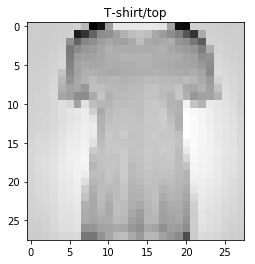

In [4]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Plot one image
plt.imshow(images[10].reshape(28, 28), cmap="binary")
#plt.title(targets_names[targets[10]])
plt.title(targets_names[targets[10]])
plt.show()

In [5]:
#print("First line of one image", images[11][0])
print("First line of one image", images[11])
print("Associated target", targets[11])

First line of one image [-0.01426971 -0.02645579 -0.029489   -0.04635542 -0.06156617 -0.07641125
 -0.10509579 -0.16410192 -0.23986957 -0.36929666 -0.57063232 -0.6909092
 -0.7582382  -0.74450346 -0.17093142  0.80572169  0.60465021  0.69474334
  0.01007169 -0.32085836 -0.20882718 -0.14379861 -0.11434416 -0.09302065
  0.08584529 -0.04969764 -0.03368099 -0.01591863 -0.0181322  -0.02297209
 -0.03365679 -0.05814043 -0.08287213 -0.13053264 -0.2464668  -0.35905423
 -0.48335079 -0.63909239 -0.83575443 -0.98917162 -1.08347998 -1.07712864
  0.7931674   1.2496451   1.35025207  1.68512162  1.97595936  1.43181167
  2.97956664  4.68907298  4.88750284  0.23595608 -0.11565956  0.14562865
 -0.06100298 -0.03312088 -0.01964757 -0.02793878 -0.0481181  -0.07617253
 -0.12670992 -0.26684818 -0.39945708 -0.49720396 -0.62326614 -0.8195795
 -0.99379417 -1.04759214 -1.10371252 -1.10221791  1.08283564  1.22639277
  1.35310524  1.34234162  1.66433217  2.15862735  2.75297169  3.22113197
  4.62472272  3.87445967 -0.1

# Create the model
![](images/simple_nn.png)

# Create the model

In [6]:
# Flatten
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

# Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

[[0.17820482 0.05316375 0.07201441 0.1023543  0.02913541 0.17055362
  0.06326886 0.24632096 0.02520118 0.05978273]] [9]


## Model Summary

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  32896     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [9]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

## Caterogical cross entropy

In [29]:
images_test = images[:5]
labels_test = targets[:5]

print(images_test.shape)
print(labels_test)

outputs_test = model.predict(images_test)

print(outputs_test.shape)
print("Output", outputs_test)

#print("\nLabels", labels_test)

filtered_outputs_test = outputs_test[np.arange(5), labels_test]
print("\nFiltered output", filtered_outputs_test)

log_filtered_output = np.log(filtered_outputs_test)
print("\nLog Filtered output", log_filtered_output)

print("Mean", log_filtered_output.mean())
print("Mean", -log_filtered_output.mean())

(5, 784)
[9 0 0 3 0]
(5, 10)
Output [[0.00155602 0.00106303 0.00698406 0.00284724 0.01145798 0.03515041
  0.01286932 0.0088392  0.04853413 0.8706986 ]
 [0.7814132  0.00516847 0.01360413 0.0021324  0.01019276 0.00489966
  0.15709291 0.00928725 0.01079097 0.00541825]
 [0.07476368 0.22221217 0.0560216  0.36471143 0.03012619 0.0860177
  0.05936769 0.04129038 0.03758162 0.02790763]
 [0.24922626 0.1875557  0.11506705 0.19797364 0.03391237 0.02039414
  0.09415954 0.03401936 0.0236186  0.04407331]
 [0.12672135 0.25767553 0.00981988 0.46853614 0.06494886 0.01375138
  0.0213926  0.01535748 0.01641455 0.00538218]]

Filtered output [0.8706986  0.7814132  0.07476368 0.19797364 0.12672135]

Log Filtered output [-0.13845943 -0.2466512  -2.5934231  -1.6196214  -2.0657647 ]
Mean -1.3327839
Mean 1.3327839


## Train the model

In [28]:
history = model.fit(images, targets, epochs=1)

10000/10000==============================] - 1s 60us/sample - loss: 1.0488 - acc: 0.6868


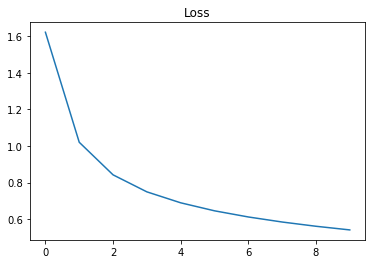

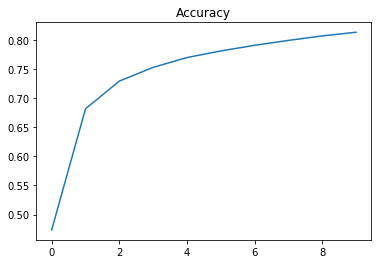

In [42]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

plt.plot(loss_curve)
plt.title("Loss")
plt.show()

plt.plot(acc_curve)
plt.title("Accuracy")
plt.show()